In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime

env_name = 'CustomPendulum-v0'

bif_c = 0.1
num_iter_max=10000
vae_lr=5e-4


In [2]:
import gym
import custom_gym
env = gym.make(env_name)
s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = 1
print(s_dim, a_dim, z_dim)

2 1 1


C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gym\utils\passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gy

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_pendulum_", evaluate=True)
agent.policy.my_np_compile()

Loading models from checkpoints/sac_checkpoint_custom_pendulum_


In [4]:
# # # # データ生成
# from get_offline_data import getOfflineData
# getOfflineData(env_name=env_name, episode_num=100)

In [5]:
offline_data = pickle.load(open("offline_data.pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info.pkl","rb"))
debug_info = np.array(debug_info)
print(debug_info.shape)
# c_array = debug_info[:,1]

# episode_index = 9
# plt.plot(offline_data[episode_index][:,0],offline_data[episode_index][:,1])
# print("env_param: ",debug_info[episode_index])

(100, 2)


In [6]:
import importlib
import vi_base
importlib.reload(vi_base)

args_init_dict = {"offline_data": offline_data,
             "s_dim": s_dim,
             "a_dim": a_dim,
             "z_dim": z_dim,
#              "policy":agent.select_action,
             "policy":agent.policy.my_np_select_action,
             "debug_info":debug_info,
             "env" : env}

vi = vi_base.baseVI(args_init_dict)


In [7]:
vi.get_real_rollout_data()

0  1  2  3  

C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gym\utils\passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gym\utils\passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
C:\Users\toru.hishinuma\anaconda3\envs\iwvi\lib\site-packages\gym\utils\passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observation space.
  logger.warn(f"{pre} is not within the observation space.")


4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(2.8330)tensor(6.4749)tensor(5.2778)tensor(4.9017)tensor(2.9698)tensor(9.6140)tensor(3.4960)tensor(4.4339)tensor(3.6634)tensor(4.1051)tensor(3.8289)tensor(7.3527)tensor(4.2839)tensor(7.1324)tensor(8.5549)tensor(9.5053)tensor(5.1862)tensor(6.2448)tensor(3.2380)tensor(4.6179)tensor(6.9106)tensor(6.1630)tensor(4.6974)tensor(3.1409)tensor(6.1055)tensor(6.9212)tensor(3.6279)tensor(5.0028)tensor(4.4461)tensor(3.4110)tensor(5.4212)tensor(3.0558)tensor(6.9153)tensor(5.9164)tensor(5.6316)tensor(10.)tensor(5.3057)tensor(4.1543)tensor(4.9349)tensor(6.5062)tensor(5.7659)tensor(3.6379)tensor(7.7655)tensor(4.1452)tensor(4.3297)tensor(6.4458)tensor(4.1032)tensor(3.5447)tensor(5.9673)tensor(4.6048)tensor(2.7983)tensor(3.4896)tensor(6.6367)tensor(3.5696)tensor(7.7458)tensor(3.1576)tensor(3.3562)tensor(5.6942)tensor(3.5629)tensor(5.5337)tensor(6.5587)tensor(2.4693)tensor(3.3149)tensor(3.4391)tensor(4.6163)tensor(5.3689)tensor(6.5360)tensor(2.7579)tensor(3.3110)tensor(5.8046)tensor(3.2051)tensor(5.

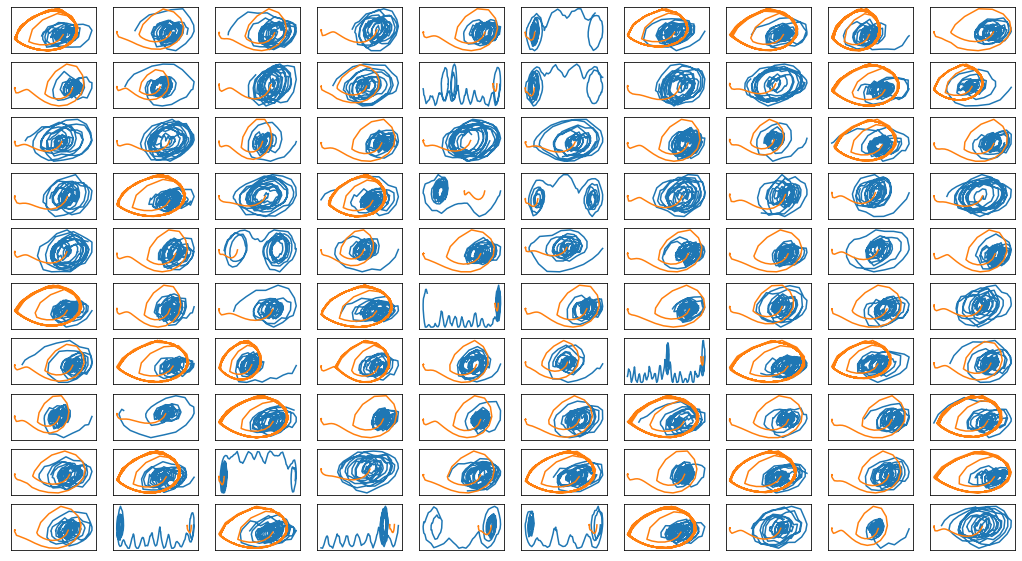

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

train_weighted_vae: enc_dec
train: iter 0  trainloss 1317.22350  validloss 1709.35337±0.00000  bestvalidloss 1709.35337  last_update 0
train: iter 1  trainloss 585.91035  validloss 635.08454±0.00000  bestvalidloss 635.08454  last_update 0
train: iter 2  trainloss 520.97031  validloss 538.11963±0.00000  bestvalidloss 538.11963  last_update 0
train: iter 3  trainloss 494.55903  validloss 505.56711±0.00000  bestvalidloss 505.56711  last_update 0
train: iter 4  trainloss 473.32266  validloss 483.51381±0.00000  bestvalidloss 483.51381  last_update 0
train: iter 5  trainloss 462.01637  validloss 463.55682±0.00000  bestvalidloss 463.55682  last_update 0
train: iter 6  trainloss 449.66172  validloss 459.78370±0.00000  bestvalidloss 459.78370  last_update 0
train: iter 7  trainloss 457.84348  validloss 441.56293±0.00000  bestvalidloss 441.56293  last_update 0
train: iter 8  trainloss 438.79563  validloss 447.33051±0.00000  bestvalidloss 441.56293  last_update 1
train: iter 9  trainloss 423.1047

train: iter 78  trainloss -495.41025  validloss -453.55783±0.00000  bestvalidloss -465.25976  last_update 1
train: iter 79  trainloss -482.01571  validloss -446.49661±0.00000  bestvalidloss -465.25976  last_update 2
train: iter 80  trainloss -500.29553  validloss -469.72597±0.00000  bestvalidloss -469.72597  last_update 0
train: iter 81  trainloss -506.27409  validloss -480.72901±0.00000  bestvalidloss -480.72901  last_update 0
train: iter 82  trainloss -486.39626  validloss -489.89762±0.00000  bestvalidloss -489.89762  last_update 0
train: iter 83  trainloss -503.96578  validloss -477.74002±0.00000  bestvalidloss -489.89762  last_update 1
train: iter 84  trainloss -513.76691  validloss -465.67335±0.00000  bestvalidloss -489.89762  last_update 2
train: iter 85  trainloss -506.40190  validloss -490.83107±0.00000  bestvalidloss -490.83107  last_update 0
train: iter 86  trainloss -514.05349  validloss -491.36145±0.00000  bestvalidloss -491.36145  last_update 0
train: iter 87  trainloss -5

train: iter 154  trainloss -600.21725  validloss -559.26291±0.00000  bestvalidloss -570.16147  last_update 6
train: iter 155  trainloss -580.16732  validloss -551.99945±0.00000  bestvalidloss -570.16147  last_update 7
train: iter 156  trainloss -614.16973  validloss -564.26586±0.00000  bestvalidloss -570.16147  last_update 8
train: iter 157  trainloss -617.48549  validloss -574.95946±0.00000  bestvalidloss -574.95946  last_update 0
train: iter 158  trainloss -598.94323  validloss -578.63334±0.00000  bestvalidloss -578.63334  last_update 0
train: iter 159  trainloss -586.65450  validloss -552.96315±0.00000  bestvalidloss -578.63334  last_update 1
train: iter 160  trainloss -565.80953  validloss -517.04258±0.00000  bestvalidloss -578.63334  last_update 2
train: iter 161  trainloss -587.94620  validloss -555.39886±0.00000  bestvalidloss -578.63334  last_update 3
train: iter 162  trainloss -598.61528  validloss -567.32889±0.00000  bestvalidloss -578.63334  last_update 4
train: iter 163  tr

train: iter 230  trainloss -683.96578  validloss -625.72633±0.00000  bestvalidloss -634.79332  last_update 1
train: iter 231  trainloss -638.54560  validloss -637.54853±0.00000  bestvalidloss -637.54853  last_update 0
train: iter 232  trainloss -623.49714  validloss -602.88996±0.00000  bestvalidloss -637.54853  last_update 1
train: iter 233  trainloss -663.33027  validloss -636.87092±0.00000  bestvalidloss -637.54853  last_update 2
train: iter 234  trainloss -691.24825  validloss -645.09041±0.00000  bestvalidloss -645.09041  last_update 0
train: iter 235  trainloss -673.05772  validloss -645.65977±0.00000  bestvalidloss -645.65977  last_update 0
train: iter 236  trainloss -667.57411  validloss -577.55219±0.00000  bestvalidloss -645.65977  last_update 1
train: iter 237  trainloss -684.10101  validloss -629.84862±0.00000  bestvalidloss -645.65977  last_update 2
train: iter 238  trainloss -688.59029  validloss -636.81317±0.00000  bestvalidloss -645.65977  last_update 3
train: iter 239  tr

train: iter 306  trainloss -684.08751  validloss -667.27694±0.00000  bestvalidloss -684.39414  last_update 5
train: iter 307  trainloss -714.26225  validloss -682.99210±0.00000  bestvalidloss -684.39414  last_update 6
train: iter 308  trainloss -705.67878  validloss -605.73240±0.00000  bestvalidloss -684.39414  last_update 7
train: iter 309  trainloss -661.39677  validloss -682.61521±0.00000  bestvalidloss -684.39414  last_update 8
train: iter 310  trainloss -709.45673  validloss -669.32757±0.00000  bestvalidloss -684.39414  last_update 9
train: iter 311  trainloss -725.73502  validloss -669.30130±0.00000  bestvalidloss -684.39414  last_update 10
train: iter 312  trainloss -692.22096  validloss -680.23614±0.00000  bestvalidloss -684.39414  last_update 11
train: iter 313  trainloss -700.94855  validloss -659.97789±0.00000  bestvalidloss -684.39414  last_update 12
train: iter 314  trainloss -710.28134  validloss -679.10176±0.00000  bestvalidloss -684.39414  last_update 13
train: iter 315

train: iter 381  trainloss -732.49058  validloss -673.71941±0.00000  bestvalidloss -704.57554  last_update 4
train: iter 382  trainloss -714.24406  validloss -681.10117±0.00000  bestvalidloss -704.57554  last_update 5
train: iter 383  trainloss -717.45737  validloss -670.09689±0.00000  bestvalidloss -704.57554  last_update 6
train: iter 384  trainloss -737.43412  validloss -691.05884±0.00000  bestvalidloss -704.57554  last_update 7
train: iter 385  trainloss -737.77171  validloss -684.40716±0.00000  bestvalidloss -704.57554  last_update 8
train: iter 386  trainloss -727.38189  validloss -690.02483±0.00000  bestvalidloss -704.57554  last_update 9
train: iter 387  trainloss -726.25380  validloss -686.34142±0.00000  bestvalidloss -704.57554  last_update 10
train: iter 388  trainloss -680.80993  validloss -694.76852±0.00000  bestvalidloss -704.57554  last_update 11
train: iter 389  trainloss -694.47499  validloss -561.96701±0.00000  bestvalidloss -704.57554  last_update 12
train: iter 390 

train: iter 456  trainloss -715.63613  validloss -690.12892±0.00000  bestvalidloss -713.59356  last_update 12
train: iter 457  trainloss -735.90681  validloss -657.77931±0.00000  bestvalidloss -713.59356  last_update 13
train: iter 458  trainloss -719.90574  validloss -689.90459±0.00000  bestvalidloss -713.59356  last_update 14
train: iter 459  trainloss -728.08341  validloss -678.51965±0.00000  bestvalidloss -713.59356  last_update 15
train: iter 460  trainloss -725.87676  validloss -694.17303±0.00000  bestvalidloss -713.59356  last_update 16
train: iter 461  trainloss -734.14043  validloss -601.18844±0.00000  bestvalidloss -713.59356  last_update 17
train: iter 462  trainloss -742.63940  validloss -707.63390±0.00000  bestvalidloss -713.59356  last_update 18
train: iter 463  trainloss -746.49873  validloss -702.15710±0.00000  bestvalidloss -713.59356  last_update 19
train: iter 464  trainloss -741.97751  validloss -700.31533±0.00000  bestvalidloss -713.59356  last_update 20
train: ite

train: iter 531  trainloss -764.35177  validloss -723.07928±0.00000  bestvalidloss -723.07928  last_update 0
train: iter 532  trainloss -636.56103  validloss -723.37399±0.00000  bestvalidloss -723.37399  last_update 0
train: iter 533  trainloss -708.44906  validloss -646.65173±0.00000  bestvalidloss -723.37399  last_update 1
train: iter 534  trainloss -711.49804  validloss -682.69727±0.00000  bestvalidloss -723.37399  last_update 2
train: iter 535  trainloss -729.30234  validloss -694.43545±0.00000  bestvalidloss -723.37399  last_update 3
train: iter 536  trainloss -704.30341  validloss -691.33982±0.00000  bestvalidloss -723.37399  last_update 4
train: iter 537  trainloss -722.57992  validloss -573.30706±0.00000  bestvalidloss -723.37399  last_update 5
train: iter 538  trainloss -722.30840  validloss -687.15330±0.00000  bestvalidloss -723.37399  last_update 6
train: iter 539  trainloss -732.82743  validloss -701.57886±0.00000  bestvalidloss -723.37399  last_update 7
train: iter 540  tr

train: iter 606  trainloss -724.61588  validloss -710.80495±0.00000  bestvalidloss -730.18089  last_update 14
train: iter 607  trainloss -744.34381  validloss -679.62672±0.00000  bestvalidloss -730.18089  last_update 15
train: iter 608  trainloss -759.99709  validloss -670.46187±0.00000  bestvalidloss -730.18089  last_update 16
train: iter 609  trainloss -755.37698  validloss -728.14228±0.00000  bestvalidloss -730.18089  last_update 17
train: iter 610  trainloss -752.22077  validloss -724.06924±0.00000  bestvalidloss -730.18089  last_update 18
train: iter 611  trainloss -756.72599  validloss -734.27982±0.00000  bestvalidloss -734.27982  last_update 0
train: iter 612  trainloss -760.33417  validloss -724.23791±0.00000  bestvalidloss -734.27982  last_update 1
train: iter 613  trainloss -756.40484  validloss -674.13838±0.00000  bestvalidloss -734.27982  last_update 2
train: iter 614  trainloss -720.88147  validloss -715.82988±0.00000  bestvalidloss -734.27982  last_update 3
train: iter 61

train: iter 681  trainloss -773.54283  validloss -739.91708±0.00000  bestvalidloss -739.91708  last_update 0
train: iter 682  trainloss -747.16915  validloss -724.00232±0.00000  bestvalidloss -739.91708  last_update 1
train: iter 683  trainloss -746.74793  validloss -728.27473±0.00000  bestvalidloss -739.91708  last_update 2
train: iter 684  trainloss -775.28067  validloss -736.25439±0.00000  bestvalidloss -739.91708  last_update 3
train: iter 685  trainloss -774.03826  validloss -731.27228±0.00000  bestvalidloss -739.91708  last_update 4
train: iter 686  trainloss -754.61310  validloss -730.46325±0.00000  bestvalidloss -739.91708  last_update 5
train: iter 687  trainloss -745.78243  validloss -643.67093±0.00000  bestvalidloss -739.91708  last_update 6
train: iter 688  trainloss -769.57360  validloss -720.15726±0.00000  bestvalidloss -739.91708  last_update 7
train: iter 689  trainloss -765.36775  validloss -737.81458±0.00000  bestvalidloss -739.91708  last_update 8
train: iter 690  tr

train: iter 756  trainloss -759.11536  validloss -701.53175±0.00000  bestvalidloss -744.94624  last_update 12
train: iter 757  trainloss -751.83773  validloss -722.52570±0.00000  bestvalidloss -744.94624  last_update 13
train: iter 758  trainloss -762.93033  validloss -717.40212±0.00000  bestvalidloss -744.94624  last_update 14
train: iter 759  trainloss -759.55616  validloss -709.42247±0.00000  bestvalidloss -744.94624  last_update 15
train: iter 760  trainloss -755.13820  validloss -691.55704±0.00000  bestvalidloss -744.94624  last_update 16
train: iter 761  trainloss -767.75430  validloss -701.83659±0.00000  bestvalidloss -744.94624  last_update 17
train: iter 762  trainloss -759.85935  validloss -706.39550±0.00000  bestvalidloss -744.94624  last_update 18
train: iter 763  trainloss -754.48688  validloss -696.10586±0.00000  bestvalidloss -744.94624  last_update 19
train: iter 764  trainloss -746.34057  validloss -688.18902±0.00000  bestvalidloss -744.94624  last_update 20
train: ite

train: iter 831  trainloss -767.04778  validloss -627.81656±0.00000  bestvalidloss -744.94624  last_update 87
train: iter 832  trainloss -782.20832  validloss -659.84247±0.00000  bestvalidloss -744.94624  last_update 88
train: iter 833  trainloss -750.26492  validloss -697.96188±0.00000  bestvalidloss -744.94624  last_update 89
train: iter 834  trainloss -762.81639  validloss -683.89020±0.00000  bestvalidloss -744.94624  last_update 90
train: iter 835  trainloss -760.86867  validloss -642.75037±0.00000  bestvalidloss -744.94624  last_update 91
train: iter 836  trainloss -771.98746  validloss -692.51890±0.00000  bestvalidloss -744.94624  last_update 92
train: iter 837  trainloss -775.35758  validloss -687.51395±0.00000  bestvalidloss -744.94624  last_update 93
train: iter 838  trainloss -774.52870  validloss -717.10015±0.00000  bestvalidloss -744.94624  last_update 94
train: iter 839  trainloss -773.57297  validloss -704.81822±0.00000  bestvalidloss -744.94624  last_update 95
train: ite

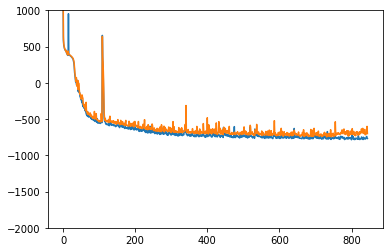

train_weighted_vae: enc
train: iter 0  trainloss -770.89506  validloss -744.33440±0.00000  bestvalidloss -744.33440  last_update 0
train: iter 1  trainloss -786.75426  validloss -738.57035±0.00000  bestvalidloss -744.33440  last_update 1
train: iter 2  trainloss -786.08773  validloss -744.68764±0.00000  bestvalidloss -744.68764  last_update 0
train: iter 3  trainloss -781.38536  validloss -742.92274±0.00000  bestvalidloss -744.68764  last_update 1
train: iter 4  trainloss -786.64240  validloss -743.56842±0.00000  bestvalidloss -744.68764  last_update 2
train: iter 5  trainloss -728.92657  validloss -740.94063±0.00000  bestvalidloss -744.68764  last_update 3
train: iter 6  trainloss -786.14711  validloss -744.44954±0.00000  bestvalidloss -744.68764  last_update 4
train: iter 7  trainloss -782.97232  validloss -745.79568±0.00000  bestvalidloss -745.79568  last_update 0
train: iter 8  trainloss -787.53304  validloss -745.30019±0.00000  bestvalidloss -745.79568  last_update 1
train: iter 9

train: iter 76  trainloss -763.50411  validloss -743.39669±0.00000  bestvalidloss -746.07591  last_update 4
train: iter 77  trainloss -758.90217  validloss -740.16524±0.00000  bestvalidloss -746.07591  last_update 5
train: iter 78  trainloss -779.17942  validloss -733.91933±0.00000  bestvalidloss -746.07591  last_update 6
train: iter 79  trainloss -785.57648  validloss -745.29457±0.00000  bestvalidloss -746.07591  last_update 7
train: iter 80  trainloss -788.00360  validloss -744.45745±0.00000  bestvalidloss -746.07591  last_update 8
train: iter 81  trainloss -786.47153  validloss -745.69900±0.00000  bestvalidloss -746.07591  last_update 9
train: iter 82  trainloss -785.84768  validloss -742.91824±0.00000  bestvalidloss -746.07591  last_update 10
train: iter 83  trainloss -779.39350  validloss -743.21022±0.00000  bestvalidloss -746.07591  last_update 11
train: iter 84  trainloss -778.37351  validloss -723.72104±0.00000  bestvalidloss -746.07591  last_update 12
train: iter 85  trainloss

train: iter 151  trainloss -786.08422  validloss -744.02659±0.00000  bestvalidloss -746.07591  last_update 79
train: iter 152  trainloss -784.75318  validloss -721.12545±0.00000  bestvalidloss -746.07591  last_update 80
train: iter 153  trainloss -775.29566  validloss -745.51566±0.00000  bestvalidloss -746.07591  last_update 81
train: iter 154  trainloss -753.43664  validloss -717.11683±0.00000  bestvalidloss -746.07591  last_update 82
train: iter 155  trainloss -777.41603  validloss -728.65131±0.00000  bestvalidloss -746.07591  last_update 83
train: iter 156  trainloss -784.34234  validloss -739.90042±0.00000  bestvalidloss -746.07591  last_update 84
train: iter 157  trainloss -787.54608  validloss -741.05777±0.00000  bestvalidloss -746.07591  last_update 85
train: iter 158  trainloss -785.29294  validloss -738.59148±0.00000  bestvalidloss -746.07591  last_update 86
train: iter 159  trainloss -787.13695  validloss -744.45807±0.00000  bestvalidloss -746.07591  last_update 87
train: ite

train: iter 54  trainloss -776.21119  validloss -720.93594±0.00000  bestvalidloss -749.15629  last_update 5
train: iter 55  trainloss -773.78018  validloss -725.14746±0.00000  bestvalidloss -749.15629  last_update 6
train: iter 56  trainloss -781.79475  validloss -728.49246±0.00000  bestvalidloss -749.15629  last_update 7
train: iter 57  trainloss -775.64343  validloss -743.33466±0.00000  bestvalidloss -749.15629  last_update 8
train: iter 58  trainloss -785.59866  validloss -754.94410±0.00000  bestvalidloss -754.94410  last_update 0
train: iter 59  trainloss -778.10447  validloss -739.22460±0.00000  bestvalidloss -754.94410  last_update 1
train: iter 60  trainloss -745.15910  validloss -748.84683±0.00000  bestvalidloss -754.94410  last_update 2
train: iter 61  trainloss -752.73898  validloss -689.58356±0.00000  bestvalidloss -754.94410  last_update 3
train: iter 62  trainloss -748.87918  validloss -714.56592±0.00000  bestvalidloss -754.94410  last_update 4
train: iter 63  trainloss -7

train: iter 130  trainloss -750.37342  validloss -745.88545±0.00000  bestvalidloss -754.94410  last_update 72
train: iter 131  trainloss -777.89248  validloss -732.10359±0.00000  bestvalidloss -754.94410  last_update 73
train: iter 132  trainloss -768.18145  validloss -740.62269±0.00000  bestvalidloss -754.94410  last_update 74
train: iter 133  trainloss -783.70531  validloss -723.66696±0.00000  bestvalidloss -754.94410  last_update 75
train: iter 134  trainloss -784.11336  validloss -742.03056±0.00000  bestvalidloss -754.94410  last_update 76
train: iter 135  trainloss -784.43329  validloss -731.20244±0.00000  bestvalidloss -754.94410  last_update 77
train: iter 136  trainloss -782.82700  validloss -735.43556±0.00000  bestvalidloss -754.94410  last_update 78
train: iter 137  trainloss -763.19524  validloss -741.68067±0.00000  bestvalidloss -754.94410  last_update 79
train: iter 138  trainloss -773.40732  validloss -722.29964±0.00000  bestvalidloss -754.94410  last_update 80
train: ite

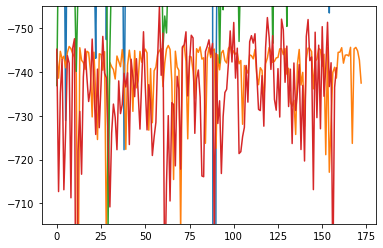

In [9]:
train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=1)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
plt.ylim([-2000, 1000])
plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=2)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)
#
#plt.show()

train_curve, valid_curve = vi.train_unweighted_vae(num_iter=num_iter_max, lr=vae_lr, early_stop_step=100, flag=3)
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()
vi.save()
plt.plot(train_curve)
plt.plot(valid_curve)

y_min = max(-2000, min(max(train_curve),max(valid_curve)))
y_max = min(1000, max(min(train_curve),min(valid_curve)))
plt.ylim([y_min, y_max])
plt.show()


In [10]:
vi.load()
vi.update_mulogvar_list_for_mixture_of_gaussian_belief()

load vi_base_ckpt


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56

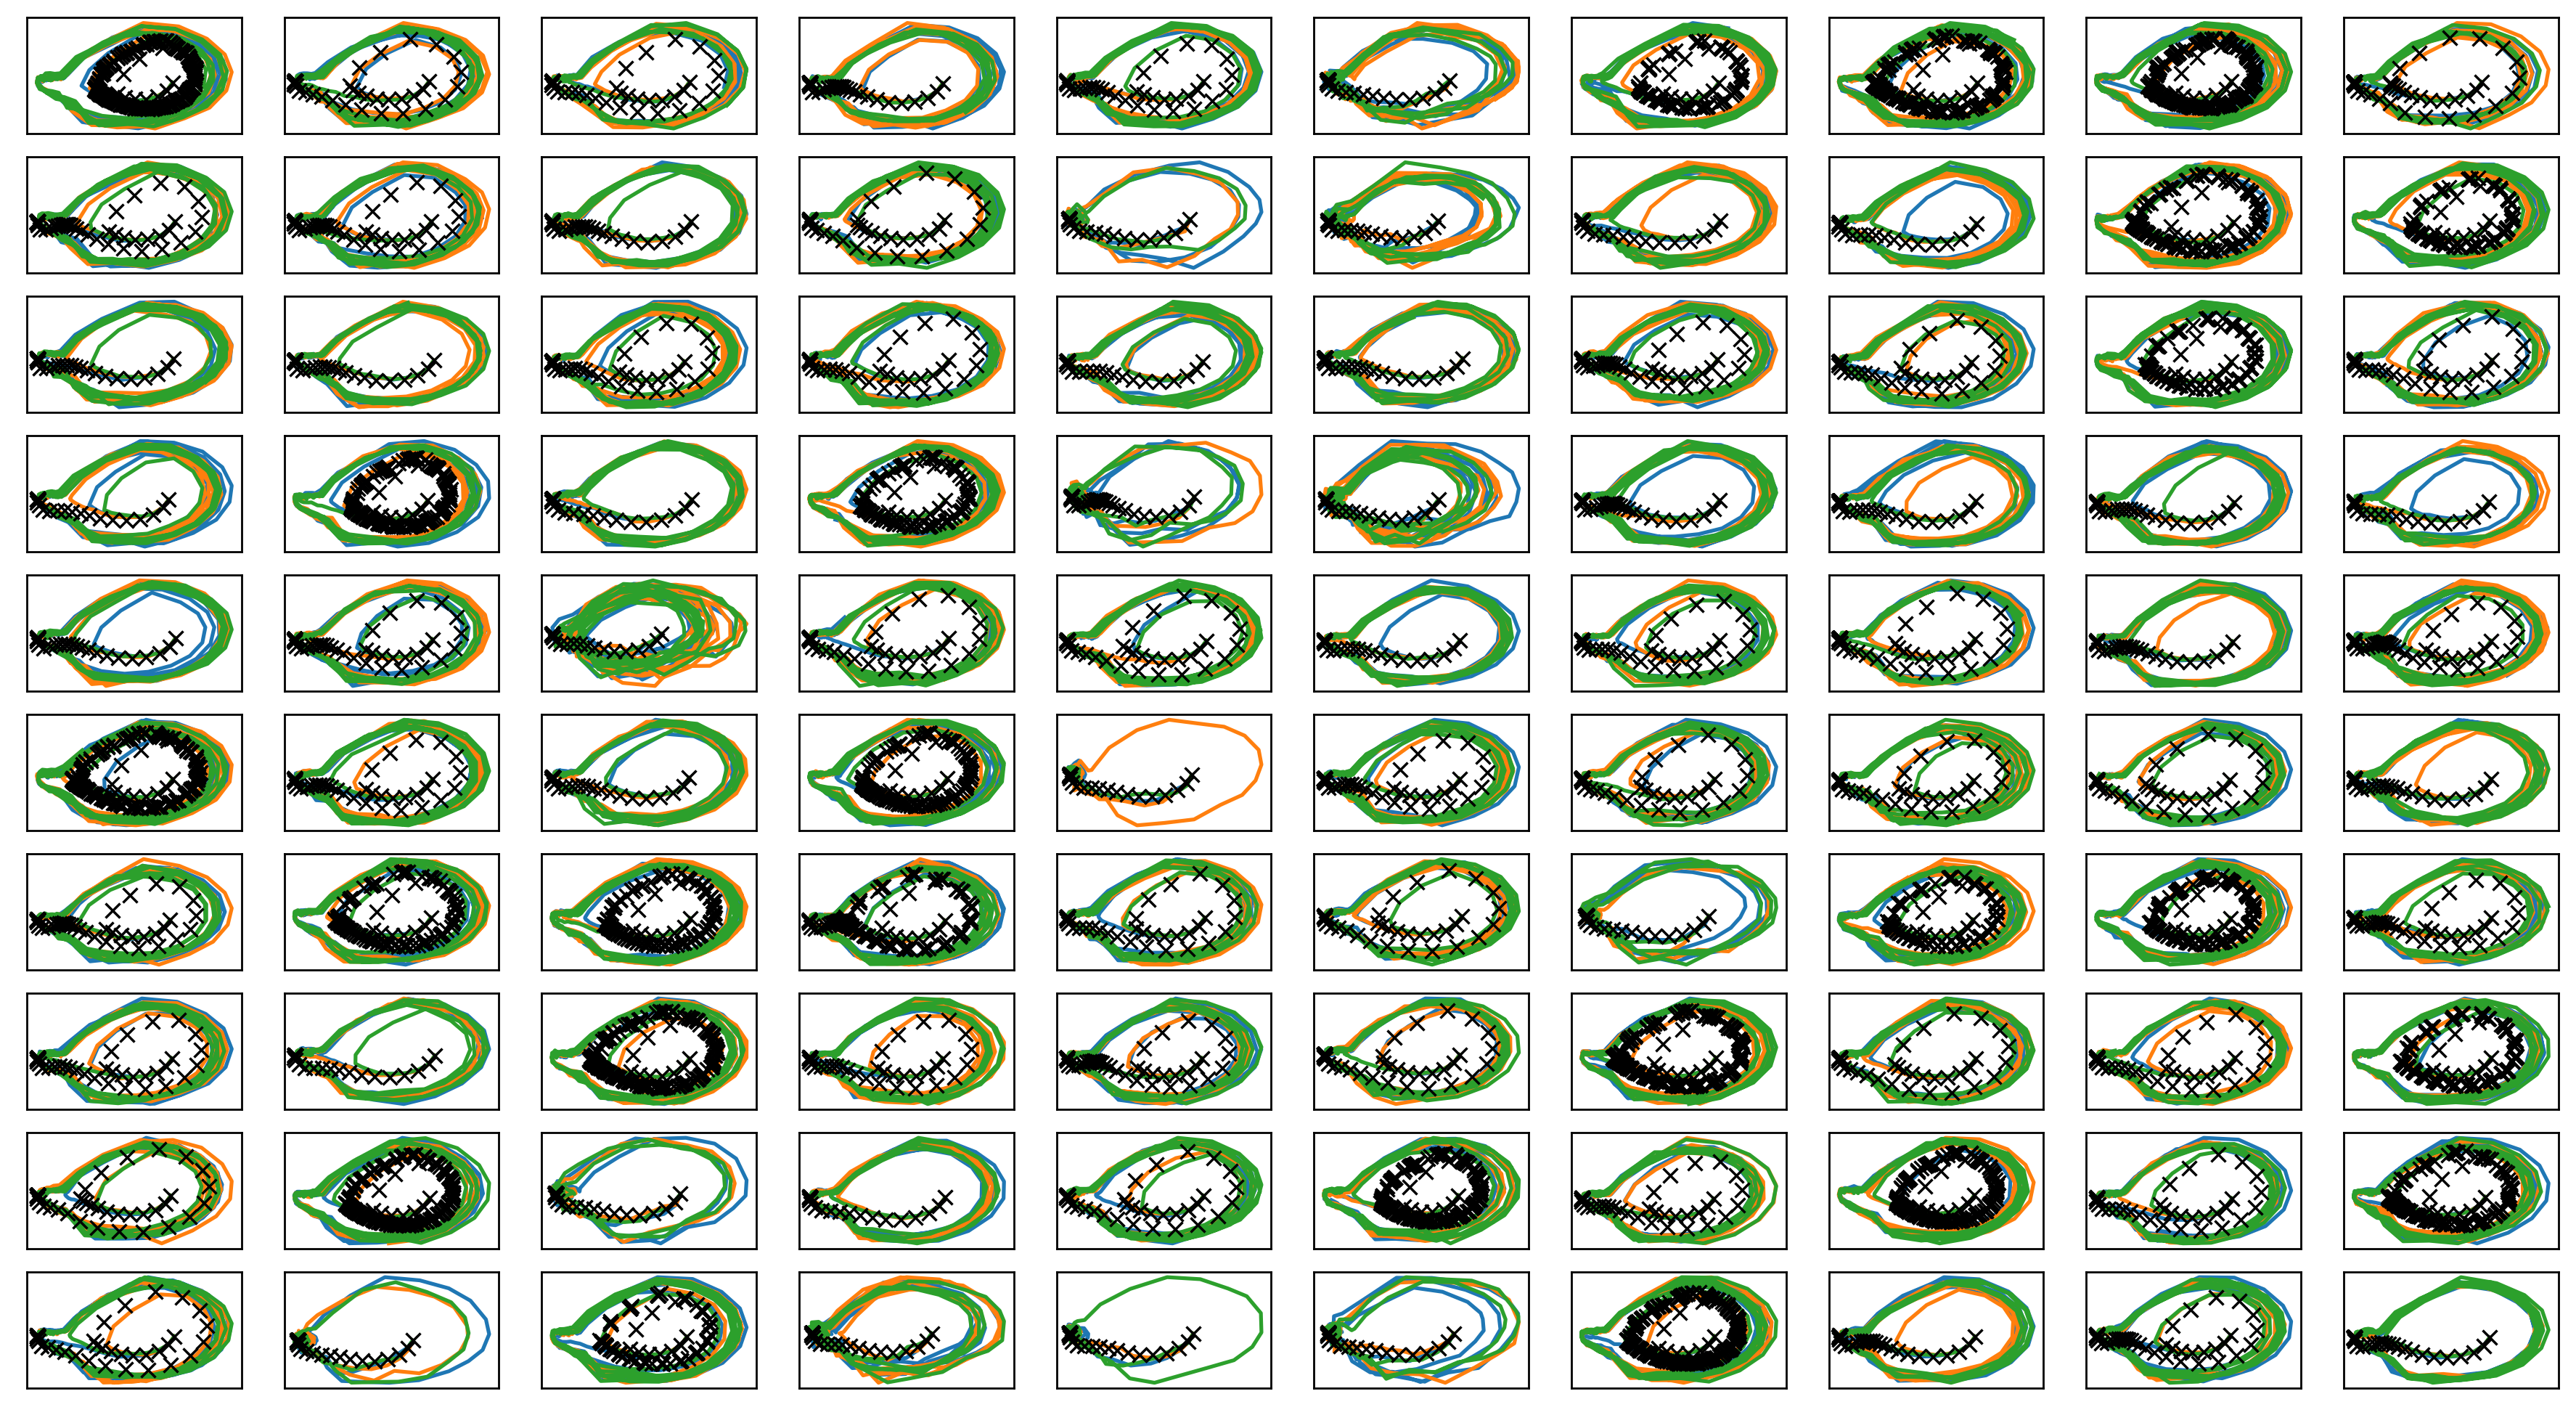

In [11]:
vi.get_sim_rollout_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata4 = copy.deepcopy(vi.simenv_rolloutdata)
# vi.get_sim_rollout_data_fixlen()
# simdata5 = copy.deepcopy(vi.simenv_rolloutdata)


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
#     ax_list[-1].plot(simdata4[i][:,0], simdata4[i][:,1]) 
#     ax_list[-1].plot(simdata5[i][:,0], simdata5[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx") 
plt.savefig("two_stage.png")
plt.savefig("two_stage.eps")
plt.savefig("two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

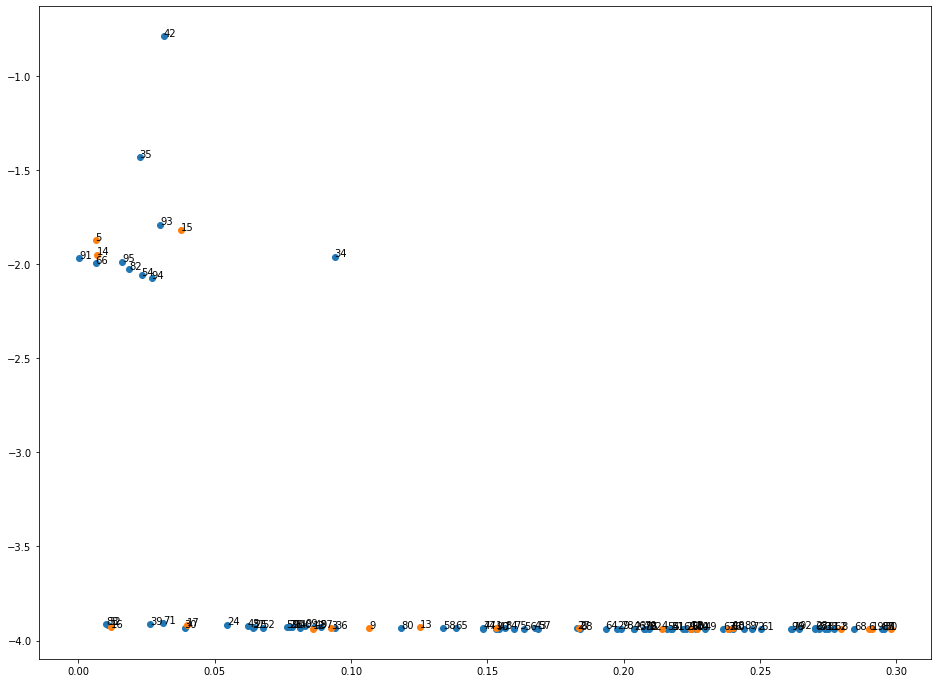

[2.97910163e-01 1.53220826e-01 1.83659868e-01 9.26191816e-02
 2.13844593e-01 6.27837980e-03 2.89779225e-01 2.38265773e-01
 2.79822967e-01 1.06560018e-01 2.26933875e-01 2.24469704e-01
 8.59668072e-02 1.25225228e-01 6.85177675e-03 3.75781305e-02
 1.19629703e-02 3.96666902e-02 2.40024726e-01 2.90920606e-01
 7.83558346e-02 7.74617180e-02 2.09342084e-01 2.03712968e-01
 5.45033670e-02 6.45179456e-02 2.22977599e-01 1.82802197e-01
 2.70079446e-01 1.97623206e-01 3.89891739e-02 2.95551208e-01
 1.09339099e-02 2.73868882e-01 9.39750535e-02 2.24849940e-02
 9.41454935e-02 6.38528531e-02 7.76722308e-02 2.63249718e-02
 8.12571593e-02 2.17703738e-01 3.12692066e-02 1.67437805e-01
 1.48473632e-01 6.20528182e-02 2.03636881e-01 1.54172753e-01
 8.64598938e-02 2.29780458e-01 2.39917584e-01 2.17433570e-01
 6.75730559e-02 2.71498098e-01 2.31935324e-02 2.15892783e-01
 1.63560970e-01 1.68441764e-01 1.33679545e-01 7.63467592e-02
 2.24768216e-01 2.50292794e-01 2.77141700e-01 2.36387227e-01
 1.93330750e-01 1.383419

In [12]:
plt.figure(figsize=(16,12))
np_mulogvar = []
for i in range(len(vi.mulogvar_list_for_mixture_of_gaussian_belief)):
    np_mulogvar.append(vi.mulogvar_list_for_mixture_of_gaussian_belief[i].numpy())
np_mulogvar = np.array(np_mulogvar)

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


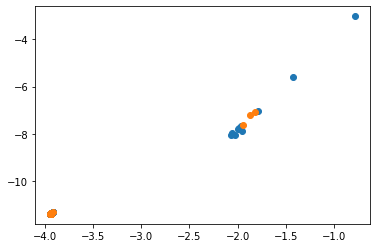

In [13]:
# plt.plot(np_mulogvar[vi.validdata_num:,0],np.exp(0.5*np_mulogvar[vi.validdata_num:,1]), "o")
# plt.plot(np_mulogvar[:vi.validdata_num,0],np.exp(0.5*np_mulogvar[:vi.validdata_num,1]),  "o")
# print("平均-標準偏差")
plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [14]:
print(datetime.datetime.now())

2023-02-18 23:23:15.844716


In [15]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=100)


train: iter 0  trainloss 7.52916  validloss 7.75988±0.00000  bestvalidloss 7.75988  last_update 0
train: iter 1  trainloss 6.86056  validloss 7.04881±0.00000  bestvalidloss 7.04881  last_update 0
train: iter 2  trainloss 6.28953  validloss 6.43895±0.00000  bestvalidloss 6.43895  last_update 0
train: iter 3  trainloss 5.79952  validloss 5.92191±0.00000  bestvalidloss 5.92191  last_update 0
train: iter 4  trainloss 5.38941  validloss 5.48691±0.00000  bestvalidloss 5.48691  last_update 0
train: iter 5  trainloss 5.02596  validloss 5.09658±0.00000  bestvalidloss 5.09658  last_update 0
train: iter 6  trainloss 4.71226  validloss 4.77970±0.00000  bestvalidloss 4.77970  last_update 0
train: iter 7  trainloss 4.43810  validloss 4.48641±0.00000  bestvalidloss 4.48641  last_update 0
train: iter 8  trainloss 4.19667  validloss 4.23680±0.00000  bestvalidloss 4.23680  last_update 0
train: iter 9  trainloss 3.98334  validloss 4.02103±0.00000  bestvalidloss 4.02103  last_update 0
train: iter 10  trai

train: iter 83  trainloss 1.14957  validloss 1.15592±0.00000  bestvalidloss 1.15281  last_update 1
train: iter 84  trainloss 1.13935  validloss 1.14675±0.00000  bestvalidloss 1.14675  last_update 0
train: iter 85  trainloss 1.13257  validloss 1.13804±0.00000  bestvalidloss 1.13804  last_update 0
train: iter 86  trainloss 1.14086  validloss 1.13694±0.00000  bestvalidloss 1.13694  last_update 0
train: iter 87  trainloss 1.11831  validloss 1.13206±0.00000  bestvalidloss 1.13206  last_update 0
train: iter 88  trainloss 1.14228  validloss 1.15887±0.00000  bestvalidloss 1.13206  last_update 1
train: iter 89  trainloss 1.12626  validloss 1.12992±0.00000  bestvalidloss 1.12992  last_update 0
train: iter 90  trainloss 1.12521  validloss 1.13494±0.00000  bestvalidloss 1.12992  last_update 1
train: iter 91  trainloss 1.10762  validloss 1.12640±0.00000  bestvalidloss 1.12640  last_update 0
train: iter 92  trainloss 1.13086  validloss 1.12777±0.00000  bestvalidloss 1.12640  last_update 1
train: ite

train: iter 166  trainloss 1.05917  validloss 1.10759±0.00000  bestvalidloss 1.09443  last_update 7
train: iter 167  trainloss 1.07729  validloss 1.10889±0.00000  bestvalidloss 1.09443  last_update 8
train: iter 168  trainloss 1.07140  validloss 1.11643±0.00000  bestvalidloss 1.09443  last_update 9
train: iter 169  trainloss 1.08201  validloss 1.09872±0.00000  bestvalidloss 1.09443  last_update 10
train: iter 170  trainloss 1.10246  validloss 1.10625±0.00000  bestvalidloss 1.09443  last_update 11
train: iter 171  trainloss 1.08331  validloss 1.10974±0.00000  bestvalidloss 1.09443  last_update 12
train: iter 172  trainloss 1.09604  validloss 1.11473±0.00000  bestvalidloss 1.09443  last_update 13
train: iter 173  trainloss 1.05853  validloss 1.10122±0.00000  bestvalidloss 1.09443  last_update 14
train: iter 174  trainloss 1.10050  validloss 1.11983±0.00000  bestvalidloss 1.09443  last_update 15
train: iter 175  trainloss 1.07406  validloss 1.11538±0.00000  bestvalidloss 1.09443  last_upd

train: iter 254  trainloss 1.08411  validloss 1.10152±0.00000  bestvalidloss 1.09443  last_update 95
train: iter 255  trainloss 1.08668  validloss 1.10439±0.00000  bestvalidloss 1.09443  last_update 96
train: iter 256  trainloss 1.10603  validloss 1.12199±0.00000  bestvalidloss 1.09443  last_update 97
train: iter 257  trainloss 1.06847  validloss 1.10372±0.00000  bestvalidloss 1.09443  last_update 98
train: iter 258  trainloss 1.07016  validloss 1.10820±0.00000  bestvalidloss 1.09443  last_update 99
train: iter 259  trainloss 1.08108  validloss 1.11362±0.00000  bestvalidloss 1.09443  last_update 100
train: fin


In [16]:
print(vi.initial_belief)

Parameter containing:
tensor([-3.6683, -0.6655], requires_grad=True)


In [17]:
# import torch
# from utils import kdl_var_approx
# x = torch.linspace(np_mulogvar[:,0].min()-0.5,np_mulogvar[:,0].max()+0.5,50)
# y = torch.linspace(np_mulogvar[:,1].min()-0.5,np_mulogvar[:,1].max()+0.5,50)

# data_xyz=[]
# for i in range(len(x)):
#     print(i)
#     for j in range(len(y)):
#         xy=torch.tensor([x[i],y[j]])
#         with torch.no_grad():
#             z = kdl_var_approx(torch.Tensor([x[i],y[j]]), vi.mulogvar_list_for_mixture_of_gaussian_belief)
#         data_xyz.append(torch.Tensor([x[i],y[j],z]))
# data_xyz = torch.vstack(data_xyz)


In [18]:
# # plt.scatter(data_xyz[:,0],data_xyz[:,1],c=data_xyz[:,2])
# # plt.colorbar()
# plt.scatter(data_xyz[:,0],data_xyz[:,1],c=torch.log(data_xyz[:,2]))
# plt.colorbar()
# i = torch.argmin(data_xyz[:,2])
# print(i,data_xyz[i])